# Population Ireland

Import libraries

In [1]:
import pandas as pd
import numpy as np
import os 
import seaborn as  sns
import math
from matplotlib import pyplot as plt

Import DataBases

In [2]:
AP=pd.read_csv("Annual Population Change 1950-2023.csv")
EE=pd.read_csv("Estimated Emigration  Citizenship 2006-2023.csv")
EM=pd.read_csv("Estimated Migration. Origin or Destination 1987-2023.csv")
EPC=pd.read_csv("Estimated Population Citizenship 2006-2023.csv")
PEA=pd.read_csv("Population Estimates Age Group 1950-2023.csv")
 #Additional databases
NIC=pd.read_csv("Non-Irish citizens usually resident and present in the State by country of citizenship 2022 EXTRA.csv")
PAE=pd.read_csv("Population Ability to speak English 2022 EXTRA.csv")

# #  Annual Population Change since 1950

Review of database

Type of files

Renaming of headers 

In [377]:
AP.head()

,STATISTIC,Year,UNIT,Annual births,Annual deaths,Natural increase,Immigrants,Emigrants,Net migration,Population change,Population
0,Annual Population Change,1951,Thousand,NaN,NaN,26.6,NaN,NaN,-35.0,-8.4,2960.6
1,Annual Population Change,1952,Thousand,NaN,NaN,27.3,NaN,NaN,-35.0,-7.7,2952.9
2,Annual Population Change,1953,Thousand,NaN,NaN,29.1,NaN,NaN,-33.0,-3.9,2949.0
3,Annual Population Change,1954,Thousand,NaN,NaN,28.2,NaN,NaN,-36.0,-7.8,2941.2
4,Annual Population Change,1955,Thousand,NaN,NaN,24.7,NaN,NaN,-45.0,-20.3,2920.9


In [378]:
AP_1=AP.copy()

In [379]:
AP=AP.rename (columns= {'Population change':'Total of the Population change','Population':'Total Population of the year'})
AP= AP.drop(['STATISTIC','UNIT'],axis= 1)

In [380]:
AP

,Year,Annual births,Annual deaths,Natural increase,Immigrants,Emigrants,Net migration,Total of the Population change,Total Population of the year
0,1951,NaN,NaN,26.6,NaN,NaN,-35.0,-8.4,2960.6
1,1952,NaN,NaN,27.3,NaN,NaN,-35.0,-7.7,2952.9
2,1953,NaN,NaN,29.1,NaN,NaN,-33.0,-3.9,2949.0
3,1954,NaN,NaN,28.2,NaN,NaN,-36.0,-7.8,2941.2
4,1955,NaN,NaN,24.7,NaN,NaN,-45.0,-20.3,2920.9
...,...,...,...,...,...,...,...,...,...
68,2019,60.5,30.9,29.6,97.1,53.1,44.0,73.6,4958.5
69,2020,59.1,32.4,26.7,95.6,50.9,44.7,71.4,5029.9
70,2021,57.3,34.3,23.0,74.1,52.3,21.8,44.8,5074.7
71,2022,59.7,33.6,26.1,107.8,56.1,51.7,77.8,5184.0


In [381]:
AP.shape

(73, 9)

In [198]:
AP.isnull().sum()

Year                               0
Annual births                     36
Annual deaths                     36
Natural increase                   0
Immigrants                        36
Emigrants                         36
Net migration                      0
Total of the Population change     0
Total Population of the year       0
dtype: int64

In [199]:
print(AP["Annual births"].isnull().head())

0    True
1    True
2    True
3    True
4    True
Name: Annual births, dtype: bool


In [200]:
AP.notnull()

,Year,Annual births,Annual deaths,Natural increase,Immigrants,Emigrants,Net migration,Total of the Population change,Total Population of the year
0,True,False,False,True,False,False,True,True,True
1,True,False,False,True,False,False,True,True,True
2,True,False,False,True,False,False,True,True,True
3,True,False,False,True,False,False,True,True,True
4,True,False,False,True,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...
68,True,True,True,True,True,True,True,True,True
69,True,True,True,True,True,True,True,True,True
70,True,True,True,True,True,True,True,True,True
71,True,True,True,True,True,True,True,True,True


In [201]:
#clase=AP.dropna(axis= "columns") will delete the whole column if any information is missing in any row, on a new file
#clase=AP.dropna(axis= "columns", inplace = True)will delete the entire column if any information is missing in any row, from the original file.
#AP.dropna(axis= 0 , inplace = True)will delete only the columns that have no information in the original file.

AP.dropna(axis= 0 , inplace = True)

In [202]:
AP.dtypes


Year                                int64
Annual births                     float64
Annual deaths                     float64
Natural increase                  float64
Immigrants                        float64
Emigrants                         float64
Net migration                     float64
Total of the Population change    float64
Total Population of the year      float64
dtype: object

In [203]:
AP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 36 to 72
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            37 non-null     int64  
 1   Annual births                   37 non-null     float64
 2   Annual deaths                   37 non-null     float64
 3   Natural increase                37 non-null     float64
 4   Immigrants                      37 non-null     float64
 5   Emigrants                       37 non-null     float64
 6   Net migration                   37 non-null     float64
 7   Total of the Population change  37 non-null     float64
 8   Total Population of the year    37 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 2.9 KB


In [204]:
AP.count()

Year                              37
Annual births                     37
Annual deaths                     37
Natural increase                  37
Immigrants                        37
Emigrants                         37
Net migration                     37
Total of the Population change    37
Total Population of the year      37
dtype: int64

In [205]:
#First graphs of births and deaths by year 

NameError: name 'plot' is not defined

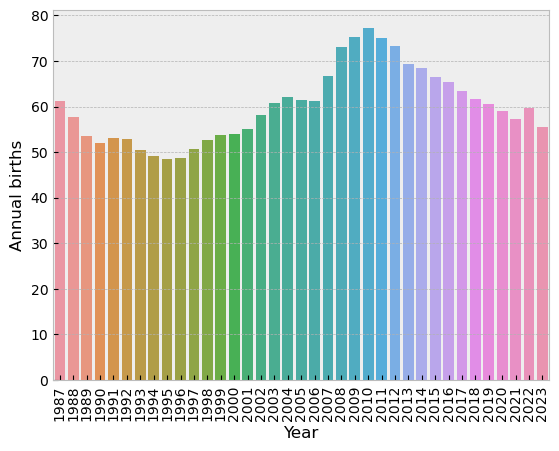

In [206]:
#Annual births
AD = sns.barplot(x='Year', y='Annual births', data=AP)
AD.set_xticklabels(AD.get_xticklabels(), rotation=90)
plot.show()

In [ ]:
#Annual Deaths
values=AP[["Year","Annual births","Annual deaths","Natural increase","Immigrants","Emigrants"]]
ax= values.plot.bar(x="Year", y="Annual deaths")

In [207]:
#Comparative births and deaths in the same years

In [208]:
#Barplot
plt.style.use('bmh')
x=AD["Births and deaths"]
y=AD['Year']
#
plt.xlabel("Births and deaths",fontsize=18)
plt.ylabel("Year", fontsize=16)
plt.tittle("Comparative births and deaths in the same years")
plt.bar(x,y)
plt.show()


TypeError: 'Axes' object is not subscriptable

In [209]:

AD=sns.barplot(AP['Annual births',AP['Annual deaths']])
plt.show()

InvalidIndexError: ('Annual births', 36    32.2
37    31.6
38    31.0
39    32.8
40    31.1
41    31.4
42    30.4
43    32.6
44    31.2
45    32.0
46    31.7
47    31.2
48    32.4
49    32.1
50    30.2
51    29.3
52    28.9
53    28.6
54    27.9
55    27.0
56    28.4
57    28.0
58    28.6
59    28.4
60    27.7
61    28.7
62    29.8
63    29.2
64    29.9
65    29.8
66    31.3
67    32.0
68    30.9
69    32.4
70    34.3
71    33.6
72    35.5
Name: Annual deaths, dtype: float64)

In [210]:
w=
plt.bar(x, Annual deaths,w, label="Annual deaths")
plt.bar(x, Annual births, w,bottom=Annual deaths, label="Annual births" )

plt.xlabel("Births and deaths")
plt.ylabel("Year")
plt.tittle("Comparative births and deaths in the same years")
plt.legend()
plt.show()

SyntaxError: invalid syntax (2041980316.py, line 1)

In [211]:
# First graph. Bar chart

<Axes: xlabel='Annual deaths'>

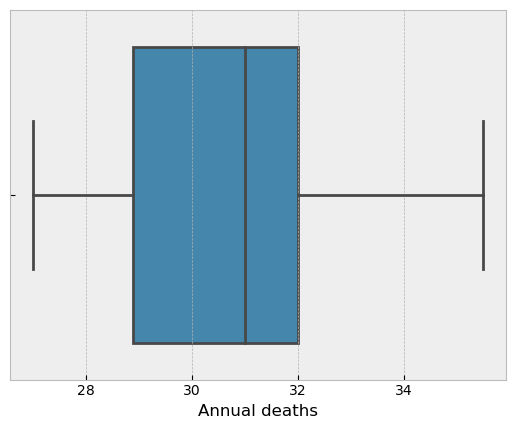

In [212]:
sns.boxplot(x=AP["Annual deaths"])

(array([1., 3., 4., 3., 3., 2., 2., 6., 4., 5., 1., 1., 1., 0., 1.]),
 array([27.        , 27.56666667, 28.13333333, 28.7       , 29.26666667,
        29.83333333, 30.4       , 30.96666667, 31.53333333, 32.1       ,
        32.66666667, 33.23333333, 33.8       , 34.36666667, 34.93333333,
        35.5       ]),
 <BarContainer object of 15 artists>)

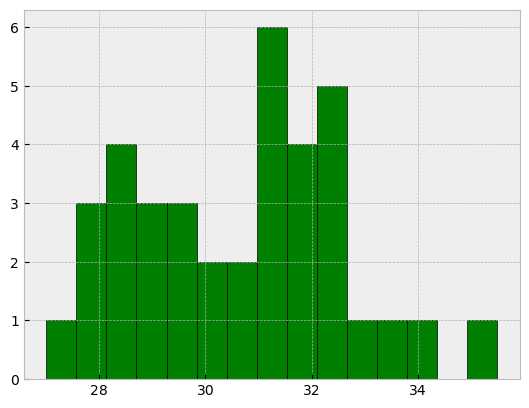

In [213]:
plt.hist(AP["Annual deaths"],15, color="green", ec="black")

In [214]:
# Original graph, extra columns are eliminated and only the totals are left.
AP_1
AP_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATISTIC          73 non-null     object 
 1   Year               73 non-null     int64  
 2   UNIT               73 non-null     object 
 3   Annual births      37 non-null     float64
 4   Annual deaths      37 non-null     float64
 5   Natural increase   73 non-null     float64
 6   Immigrants         37 non-null     float64
 7   Emigrants          37 non-null     float64
 8   Net migration      73 non-null     float64
 9   Population change  73 non-null     float64
 10  Population         73 non-null     float64
dtypes: float64(8), int64(1), object(2)
memory usage: 6.4+ KB


In [215]:
AP_1 = AP_1.drop(["STATISTIC", "UNIT","Annual births" , "Annual deaths", "Immigrants", "Emigrants"], axis=1)
AP_1.head()

,Year,Natural increase,Net migration,Population change,Population
0,1951,26.6,-35.0,-8.4,2960.6
1,1952,27.3,-35.0,-7.7,2952.9
2,1953,29.1,-33.0,-3.9,2949.0
3,1954,28.2,-36.0,-7.8,2941.2
4,1955,24.7,-45.0,-20.3,2920.9


In [216]:
AP_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               73 non-null     int64  
 1   Natural increase   73 non-null     float64
 2   Net migration      73 non-null     float64
 3   Population change  73 non-null     float64
 4   Population         73 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 3.0 KB


NameError: name 'plot' is not defined

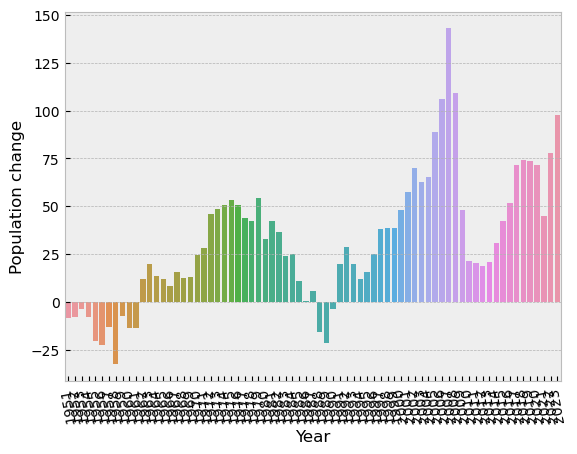

In [612]:
#Population change
AD = sns.barplot(x='Year', y='Population change', data=AP_1)
AD.set_xticklabels(AD.get_xticklabels(), rotation=100)
plot.show()

# Net migration
AD = sns.barplot(x='Year', y='Net migration', data=AP_1)
AD.set_xticklabels(AD.get_xticklabels(), rotation=1500)
plot.show()

# # Non-Irish citizens usually resident and present in the State by country of citizenship 2022

In [3]:
NIC

,Statistic,Census Year,Sex,UNIT,All citizenships,Austria,Belgium,Bulgaria,Croatia,Cyprus,...,Suriname,Central African Republic,Gabon,Equatorial Guinea,Papua New Guinea,Democratic Rep of Congo,Timor-Leste,Myanmar,Korea (the Democratic People's Republic of) North Korea,Rest of the World (1)
0,Non-Irish citizens usually resident and presen...,2022,Both sexes,Number,631785,1079,1581,3994,13649,207,...,1,7,2,7,4,954,55,58,8,17844
1,Non-Irish citizens usually resident and presen...,2022,Male,Number,314707,458,845,2012,7479,110,...,0,4,0,5,2,494,52,33,2,8903
2,Non-Irish citizens usually resident and presen...,2022,Female,Number,317078,621,736,1982,6170,97,...,1,3,2,2,2,460,3,25,6,8941


In [4]:
NIC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Columns: 183 entries, Statistic to Rest of the World (1)
dtypes: int64(180), object(3)
memory usage: 4.4+ KB


In [5]:
NIC= NIC.drop(columns=['Statistic','Census Year','UNIT','All citizenships'])
NIC.head()

,Sex,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,...,Suriname,Central African Republic,Gabon,Equatorial Guinea,Papua New Guinea,Democratic Rep of Congo,Timor-Leste,Myanmar,Korea (the Democratic People's Republic of) North Korea,Rest of the World (1)
0,Both sexes,1079,1581,3994,13649,207,4530,935,1892,1061,...,1,7,2,7,4,954,55,58,8,17844
1,Male,458,845,2012,7479,110,2226,497,741,339,...,0,4,0,5,2,494,52,33,2,8903
2,Female,621,736,1982,6170,97,2304,438,1151,722,...,1,3,2,2,2,460,3,25,6,8941


In [6]:
NIC=NIC.rename (columns= {'United Kingdom of Great Britain and Northern Ireland (the)':'UK','United States of America (the)':'USA','Netherlands (the)':'Netherlands'})

In [7]:
NIC.shape

(3, 179)

In [8]:
NIC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Columns: 179 entries, Sex to Rest of the World (1)
dtypes: int64(178), object(1)
memory usage: 4.3+ KB


In [9]:
NIC_1=NIC.copy()

In [10]:
NIC = NIC.drop(NIC.index[[1,2]],
               axis=0)
NIC.head()

,Sex,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,...,Suriname,Central African Republic,Gabon,Equatorial Guinea,Papua New Guinea,Democratic Rep of Congo,Timor-Leste,Myanmar,Korea (the Democratic People's Republic of) North Korea,Rest of the World (1)
0,Both sexes,1079,1581,3994,13649,207,4530,935,1892,1061,...,1,7,2,7,4,954,55,58,8,17844


In [11]:
NIC_3=NIC.melt(var_name="city",value_name="Number of migrants")
NIC_3

,city,Number of migrants
0,Sex,Both sexes
1,Austria,1079
2,Belgium,1581
3,Bulgaria,3994
4,Croatia,13649
...,...,...
174,Democratic Rep of Congo,954
175,Timor-Leste,55
176,Myanmar,58
177,Korea (the Democratic People's Republic of) No...,8


In [12]:
NIC_3 = NIC_3.drop(NIC_3.index[[0]],
               axis=0)
NIC_3.head()

,city,Number of migrants
1,Austria,1079
2,Belgium,1581
3,Bulgaria,3994
4,Croatia,13649
5,Cyprus,207


In [13]:
NIC_3.sum()

city                  AustriaBelgiumBulgariaCroatiaCyprusCzechiaDenm...
Number of migrants                                               631785
dtype: object

In [14]:
print(NIC_3.sort_values(by=['Number of migrants'],ascending=[False]))

                 city Number of migrants
20             Poland              93680
27                 UK              83347
95              India              45449
22            Romania              43323
16          Lithuania              31177
..                ...                ...
130      Turkmenistan                  5
173  Papua New Guinea                  4
129        Tajikistan                  4
171             Gabon                  2
169          Suriname                  1

[178 rows x 2 columns]


In [15]:
NIC_3['Number of migrants'].mean()

3549.35393258427

In [16]:
NIC_3['Number of migrants'].max()

93680

In [17]:
NIC_3['Number of migrants'].min()

1

In [18]:
first_26= NIC_3[NIC_3['Number of migrants']>3549.36]
first_26.head()

,city,Number of migrants
3,Bulgaria,3994
4,Croatia,13649
6,Czechia,4530
10,France,13893
11,Germany,12390


In [19]:
first_26.shape

(26, 2)

In [20]:
first_26.sum()

city                  BulgariaCroatiaCzechiaFranceGermanyHungaryItal...
Number of migrants                                               547185
dtype: object

In [21]:
rest= NIC_3[NIC_3['Number of migrants']<3549.36]
rest.head()

,city,Number of migrants
1,Austria,1079
2,Belgium,1581
5,Cyprus,207
7,Denmark,935
8,Estonia,1892


In [22]:
rest.shape

(152, 2)

In [23]:
rest.sum()

city                  AustriaBelgiumCyprusDenmarkEstoniaFinlandGreec...
Number of migrants                                                84600
dtype: object

In [24]:
rest['Number of migrants'].sum()

84600

In [25]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 1 to 177
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   city                152 non-null    object
 1   Number of migrants  152 non-null    object
dtypes: object(2)
memory usage: 3.6+ KB


In [26]:
#Total of migrants in 2022 (631785)

In [27]:
Total= 547185 +84600 

In [28]:
Total

631785

In [29]:
Rest_countries={"city": "Rest of the World Total","Number of migrants":84600}

first_26 = first_26.append( Rest_countries, ignore_index=True)

first_26

C:\Users\mara_\AppData\Local\Temp\ipykernel_21724\1639444848.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  first_26 = first_26.append( Rest_countries, ignore_index=True)


,city,Number of migrants
0,Bulgaria,3994
1,Croatia,13649
2,Czechia,4530
3,France,13893
4,Germany,12390
5,Hungary,8503
6,Italy,18319
7,Latvia,18300
8,Lithuania,31177
9,Netherlands,4670


In [30]:
first_26['Number of migrants'].sum()

631785

In [31]:
x=first_26['city']
y=first_26['Number of migrants']

NIC.melt(var_name="Country",value_name="Number of migrants")

<BarContainer object of 27 artists>

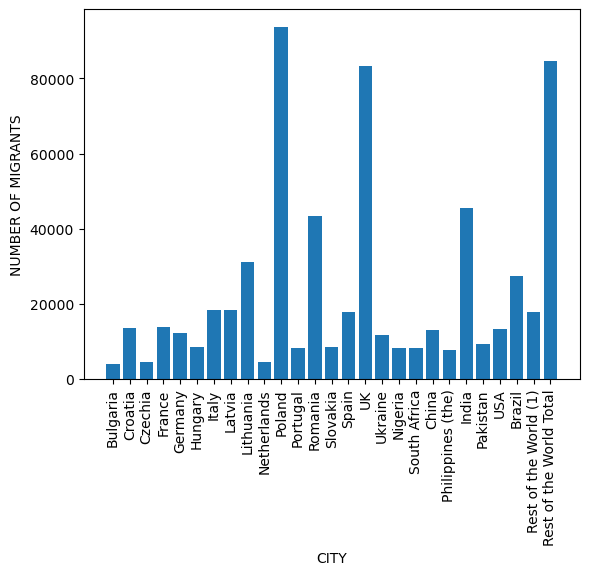

In [32]:
plt.xlabel('CITY',fontsize=10)
plt.ylabel('NUMBER OF MIGRANTS',fontsize=10)
plt.xticks(rotation=90)
plt.bar(x,y)


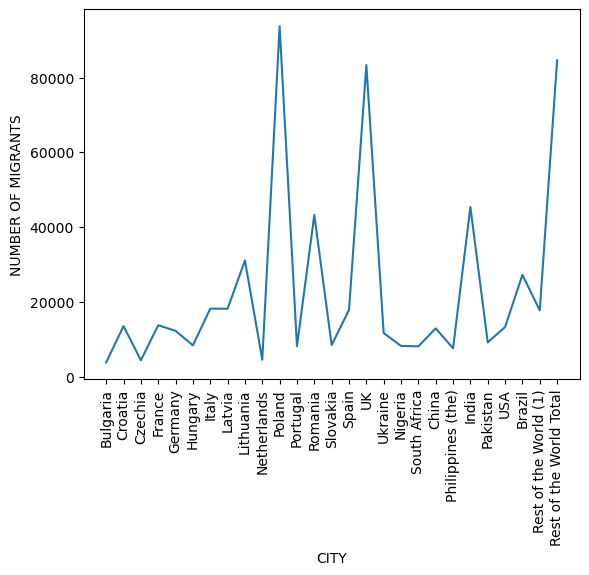

In [33]:
plt.xlabel('CITY',fontsize=10)
plt.ylabel('NUMBER OF MIGRANTS',fontsize=10)
plt.xticks(rotation=90)
plt.plot(x,y)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Bulgaria'),
  Text(1, 0, 'Croatia'),
  Text(2, 0, 'Czechia'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Hungary'),
  Text(6, 0, 'Italy'),
  Text(7, 0, 'Latvia'),
  Text(8, 0, 'Lithuania'),
  Text(9, 0, 'Netherlands'),
  Text(10, 0, 'Poland'),
  Text(11, 0, 'Portugal'),
  Text(12, 0, 'Romania'),
  Text(13, 0, 'Slovakia'),
  Text(14, 0, 'Spain'),
  Text(15, 0, 'UK'),
  Text(16, 0, 'Ukraine'),
  Text(17, 0, 'Nigeria'),
  Text(18, 0, 'South Africa'),
  Text(19, 0, 'China'),
  Text(20, 0, 'Philippines (the)'),
  Text(21, 0, 'India'),
  Text(22, 0, 'Pakistan'),
  Text(23, 0, 'USA'),
  Text(24, 0, 'Brazil'),
  Text(25, 0, 'Rest of the World (1)'),
  Text(26, 0, 'Rest of the World Total')])

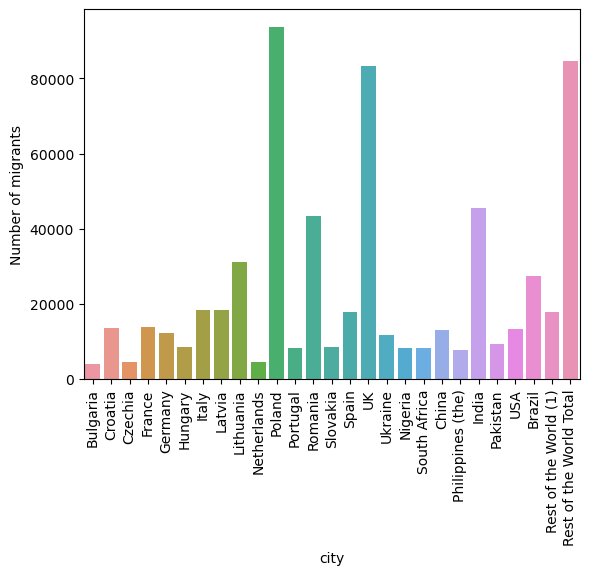

In [34]:
 ax = sns.barplot(x='city', y='Number of migrants', data=first_26) 
plt.xticks(rotation=90)


<Axes: title={'center': 'TOP 26 Migrants in Ireland'}, ylabel='city'>

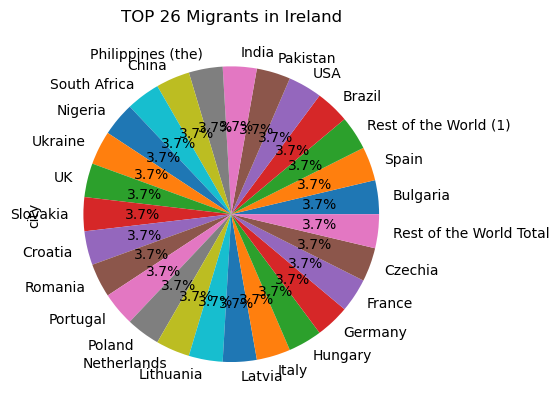

In [35]:
first_26["city"].value_counts().plot(kind="pie",autopct='%0.01f%%',
                                               title='TOP 26 Migrants in Ireland')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'Bulgaria'),
  Text(1, 0, 'Croatia'),
  Text(2, 0, 'Czechia'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Hungary'),
  Text(6, 0, 'Italy'),
  Text(7, 0, 'Latvia'),
  Text(8, 0, 'Lithuania'),
  Text(9, 0, 'Netherlands'),
  Text(10, 0, 'Poland'),
  Text(11, 0, 'Portugal'),
  Text(12, 0, 'Romania'),
  Text(13, 0, 'Slovakia'),
  Text(14, 0, 'Spain'),
  Text(15, 0, 'UK'),
  Text(16, 0, 'Ukraine'),
  Text(17, 0, 'Nigeria'),
  Text(18, 0, 'South Africa'),
  Text(19, 0, 'China'),
  Text(20, 0, 'Philippines (the)'),
  Text(21, 0, 'India'),
  Text(22, 0, 'Pakistan'),
  Text(23, 0, 'USA'),
  Text(24, 0, 'Brazil'),
  Text(25, 0, 'Rest of the World (1)'),
  Text(26, 0, 'Rest of the World Total')])

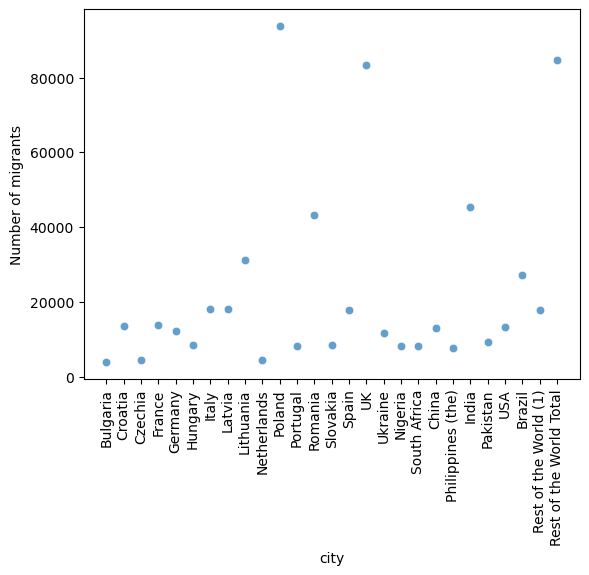

In [36]:
sns.scatterplot(data=first_26, x='city', y='Number of migrants', alpha=0.7); 
plt.xticks(rotation=90)

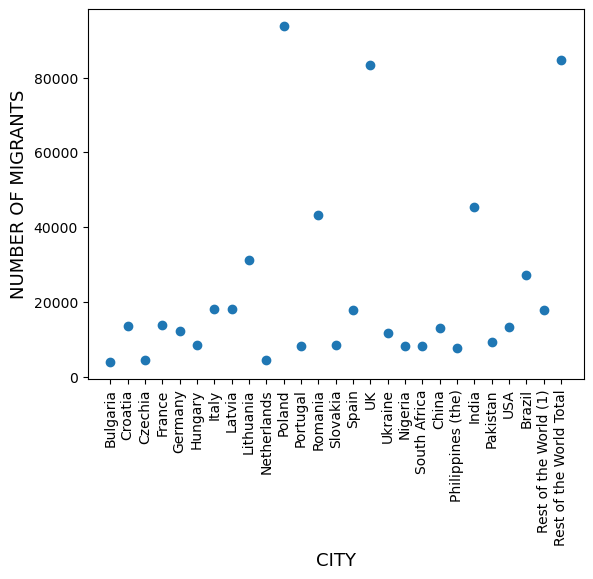

In [37]:
plt.xlabel('CITY',fontsize=13)
plt.ylabel('NUMBER OF MIGRANTS',fontsize=13)
plt.xticks(rotation=90)
plt.scatter(x,y)

# Migrants by sex

In [38]:
NIC_1['Total']= NIC_1.sum(axis=1)
NIC_1

C:\Users\mara_\AppData\Local\Temp\ipykernel_21724\3941138457.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  NIC_1['Total']= NIC_1.sum(axis=1)


,Sex,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,...,Central African Republic,Gabon,Equatorial Guinea,Papua New Guinea,Democratic Rep of Congo,Timor-Leste,Myanmar,Korea (the Democratic People's Republic of) North Korea,Rest of the World (1),Total
0,Both sexes,1079,1581,3994,13649,207,4530,935,1892,1061,...,7,2,7,4,954,55,58,8,17844,631785
1,Male,458,845,2012,7479,110,2226,497,741,339,...,4,0,5,2,494,52,33,2,8903,314707
2,Female,621,736,1982,6170,97,2304,438,1151,722,...,3,2,2,2,460,3,25,6,8941,317078


In [39]:
NIC_1 = NIC_1.drop(NIC_1.index[[0]],
               axis=0)
NIC_1.head()

,Sex,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,...,Central African Republic,Gabon,Equatorial Guinea,Papua New Guinea,Democratic Rep of Congo,Timor-Leste,Myanmar,Korea (the Democratic People's Republic of) North Korea,Rest of the World (1),Total
1,Male,458,845,2012,7479,110,2226,497,741,339,...,4,0,5,2,494,52,33,2,8903,314707
2,Female,621,736,1982,6170,97,2304,438,1151,722,...,3,2,2,2,460,3,25,6,8941,317078
